# YouTube Streamer Analysis

- Description:
This dataset contains valuable information about the top YouTube streamers,including their ranking, categories, subscribers, country, visits, likes, comments, and more.
    
## Data

Top 1000 Youtubers statistics

The dataset used for this project contains 9 columns namely:
1. `ranking`: Ranking of the account
2. `username`: Account name of the YouTuber of YouTube website
2. `categories`: Category the content created falls into
3. `subscribers`: Number of subscribers
4. `country`: Country the YouTuber hails from
5. `visits`: Number of views that account has amassed
6. `likes` : Total number of likes on the account
7. `comments`: Total number of comments 
8. `links`: A link to the account

## Aim
The aim is to perform a comprehensive analysis of the dataset to extract insights about the top YouTube content creators.


In [1]:
# Importing Libraries
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

warnings.filterwarnings("ignore")

In [2]:
#Importing Youtuber Data
df=pd.read_csv('youtubers_df.csv')
df.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


# DATA EXPLORATION

Check for Duplicates, Missing Values, and Outliers. The Values for the `Categories` and `Countries` columns are in spanish, We convert them to english.

### Making some corrections - renaming the column

In [4]:
#correcting the name suscribers to subscribers
df.rename(columns={'Suscribers':'Subscribers'},inplace=True)
#check the columns of the data frame
df.columns

Index(['Rank', 'Username', 'Categories', 'Subscribers', 'Country', 'Visits',
       'Likes', 'Comments', 'Links'],
      dtype='object')

### Dealing with Duplicates 

In [5]:
# checking for duplicates
df.duplicated().sum()

0

In [6]:
# checking for duplicates with link since the youtube links is expected to be unique
df["Links"].duplicated().sum()

6

In [7]:
# Display the duplicated rows
df[df.Links.duplicated(keep=False)]

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links
249,250,NickyJamTV,"Música y baile, Películas",23700000.0,Colombia,15800.0,1200.0,58.0,http://youtube.com/channel/UCpb_iJuhFe8V6rQdbN...
250,251,NickyJamTV,"Música y baile, Películas",23700000.0,Colombia,15800.0,1200.0,58.0,http://youtube.com/channel/UCpb_iJuhFe8V6rQdbN...
447,448,mgcplayhouse,"Juguetes, Coches y vehículos",17800000.0,Unknown,56300.0,96.0,0.0,http://youtube.com/channel/UC6zPzUJo8hu-5TzUk8...
449,450,thexoteam,NaN,17800000.0,Estados Unidos,797600.0,50400.0,179.0,http://youtube.com/channel/UClZAOlfhJQJRym39Wo...
450,451,thexoteam,NaN,17900000.0,Estados Unidos,772800.0,45000.0,185.0,http://youtube.com/channel/UClZAOlfhJQJRym39Wo...
451,452,mgcplayhouse,"Juguetes, Coches y vehículos",17800000.0,Unknown,63600.0,75.0,0.0,http://youtube.com/channel/UC6zPzUJo8hu-5TzUk8...
946,947,Super_Senya_RU,"Animación, Juguetes",12100000.0,Unknown,47200.0,192.0,0.0,http://youtube.com/channel/UCTn9Vyy-3fzLIr0bqh...
947,948,HiTechIslamic,Música y baile,12100000.0,Pakistán,62200.0,810.0,59.0,http://youtube.com/channel/UCtKKyuORzErSd7TWfk...
949,950,Family-Box,Películas,12000000.0,Rusia,173600.0,6600.0,105.0,http://youtube.com/channel/UC-jHNWViReG6R_kJ6b...
952,953,Super_Senya_RU,"Animación, Juguetes",12100000.0,Unknown,47200.0,192.0,0.0,http://youtube.com/channel/UCTn9Vyy-3fzLIr0bqh...


In [8]:
# Drop Duplicated Rows
df.drop(index= [249,450,451,946,947,956], inplace = True, axis=0)
df.reset_index(drop=True, inplace=True)
# Rechecking duplicates
df["Links"].duplicated().sum()

0

### Dealing with Missing Values

In [9]:
#missing Value
df.isnull().sum()

Rank             0
Username         0
Categories     305
Subscribers      0
Country          0
Visits           0
Likes            0
Comments         0
Links            0
dtype: int64

In [10]:
# Filling the missing values in the Categories
df["Categories"].fillna(value="Unknown", inplace=True)

In [11]:
df.Categories[df["Categories"]=="Unknown"].value_counts()

Categories
Unknown    305
Name: count, dtype: int64

 - The Missing values has been filled with `Unknown`

In [12]:
# rechecking the missing Values
df.isnull().sum()

Rank           0
Username       0
Categories     0
Subscribers    0
Country        0
Visits         0
Likes          0
Comments       0
Links          0
dtype: int64

### Dealing with Spanish Translation

In [13]:
# Creating a dictionary translating words from spanish to english language 
categories_dict = {
    'Música y baile': 'Music and Dance',
    'Videojuegos, Humor': 'Video Games, Humor',
    'Educación': 'Education',
    'Unknown': 'Unknown',
    'Animación, Juguetes': 'Animation, Toys',
    'Películas, Videojuegos': 'Movies, Video Games',
    'Juguetes': 'Toys',
    'Videojuegos': 'Video Games',
    'Películas, Animación': 'Movies, Animation',
    'Películas': 'Movies',
    'Noticias y Política': 'News and Politics',
    'Animación, Humor': 'Animation, Humor',
    'Música y baile, Animación': 'Music and Dance, Animation',
    'Música y baile, Películas': 'Music and Dance, Movies',
    'Películas, Juguetes': 'Movies, Toys',
    'Películas, Humor': 'Movies, Humor',
    'Vlogs diarios': 'Daily Vlogs',
    'Videojuegos, Juguetes': 'Video Games, Toys',
    'Animación, Videojuegos': 'Animation, Video Games',
    'Animación': 'Animation',
    'Música y baile, Humor': 'Music and Dance, Humor',
    'Diseño/arte, DIY y Life Hacks': 'Design/Art, DIY and Life Hacks',
    'Ciencia y tecnología': 'Science and Technology',
    'Fitness, Salud y autoayuda': 'Fitness, Health and Self-help',
    'Belleza, Moda': 'Beauty, Fashion',
    'Humor': 'Humor',
    'Comida y bebida': 'Food and Drink',
    'Deportes': 'Sports',
    'Fitness': 'Fitness',
    'Viajes, Espectáculos': 'Travel, Entertainment',
    'Comida y bebida, Salud y autoayuda': 'Food and Drink, Health and Self-help',
    'Diseño/arte': 'Design/Art',
    'DIY y Life Hacks, Juguetes': 'DIY and Life Hacks, Toys',
    'Educación, Juguetes': 'Education, Toys',
    'Juguetes, Coches y vehículos': 'Toys, Cars and Vehicles',
    'Música y baile, Juguetes': 'Music and Dance, Toys',
    'Animales y mascotas': 'Animals and Pets',
    'ASMR': 'ASMR',
    'Moda': 'Fashion',
    'DIY y Life Hacks': 'DIY and Life Hacks',
    'Diseño/arte, Belleza': 'Design/Art, Beauty',
    'Coches y vehículos': 'Cars and Vehicles',
    'Animación, Humor, Juguetes': 'Animation, Humor, Toys',
    'ASMR, Comida y bebida': 'ASMR, Food and Drink',
    'Comida y bebida, Juguetes': 'Food and Drink, Toys',
    'Juguetes, DIY y Life Hacks': 'Toys, DIY and Life Hacks'
}

# Apply the translation function to the 'Categories' column
df['Categories'] = df['Categories'].replace(categories_dict)

In [14]:
countries_dict= {
    'India': 'India',
    'Estados Unidos': 'United States',
    'Unknown': 'Unknown',
    'Brasil': 'Brazil',
    'México': 'Mexico',
    'Rusia': 'Russia',
    'Pakistán': 'Pakistan',
    'Filipinas': 'Philippines',
    'Indonesia': 'Indonesia',
    'Tailandia': 'Thailand',
    'Francia': 'France',
    'Colombia': 'Colombia',
    'Iraq': 'Iraq',
    'Japón': 'Japan',
    'Ecuador': 'Ecuador',
    'Argentina': 'Argentina',
    'Turquía': 'Turkey',
    'Arabia Saudita': 'Saudi Arabia',
    'El Salvador': 'El Salvador',
    'Bangladesh': 'Bangladesh',
    'Reino Unido': 'United Kingdom',
    'Argelia': 'Algeria',
    'España': 'Spain',
    'Perú': 'Peru',
    'Egipto': 'Egypt',
    'Jordania': 'Jordan',
    'Marruecos': 'Morocco',
    'Singapur': 'Singapore',
    'Somalia': 'Somalia'
}

# Apply the translation function to the 'Category' column
df['Country'] = df['Country'].replace(countries_dict)

In [15]:
# Check the first 5 rows of the df to confirm the translation 
df.head()

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Music and Dance,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Video Games, Humor",183500000.0,United States,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Education,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,Unknown,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animation, Toys",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [16]:
# subsetting columns with numbers 
num=df.select_dtypes("number").astype("int")
num.head()

,Rank,Subscribers,Visits,Likes,Comments
0,1,249500000,86200,2700,78
1,2,183500000,117400000,5300000,18500
2,3,165500000,7000000,24700,0
3,4,162600000,15600,166,9
4,5,113500000,3900000,12400,0


### Checking for Outliers

In [17]:
# Drop the "rank" column from the DataFrame 
df.drop(columns=['Rank'], inplace= True)

# Save the cleaned dataset
df.to_csv('youtubers_cleaned.csv', index= False)

<Figure size 1200x800 with 0 Axes>

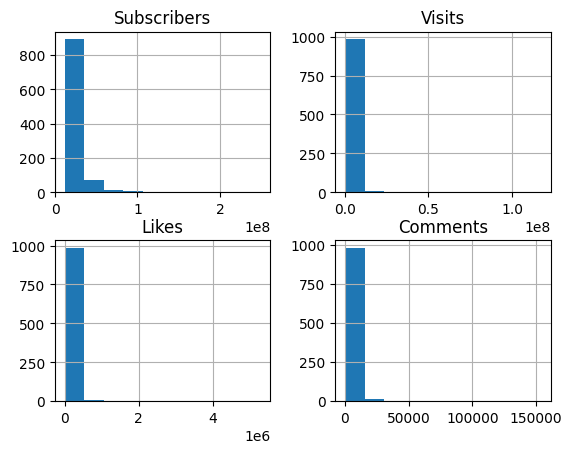

In [18]:
# checking the distribution of the numeric columns in the dataframe
fig=plt.figure(figsize=(12,8))
df.hist();

#### Observation: 

The histogram illustrates the distribution of numerical columns, revealing the presence of outliers. This is expected as the dataset encompasses diverse YouTube channels, each drawing varying levels of subscribers, likes, and comments. To gain a more in-depth understanding of these outliers, employing boxplots would be beneficial. Boxplots offer a concise representation, displaying the median, quartiles, and potential outliers in the dataset.

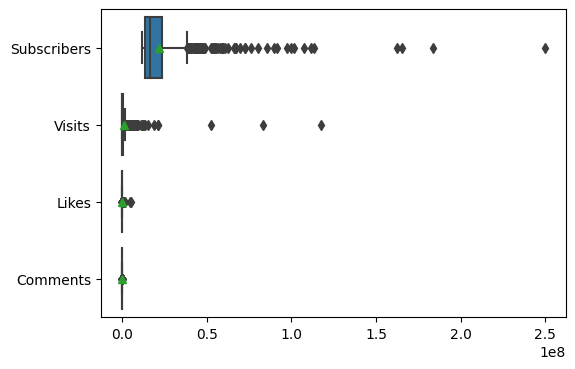

In [19]:
#checking for outliers
fig=plt.figure(figsize=(6,4))
sns.boxplot(df,
             showmeans = True,
             orient="h"
);

# Trend Analysis

    ● Is dentify trends among the top YouTube streamers. Which categories are the most popular?
    ● Is there a correlation between the number of subscribers and the number of likes or comments?

To identify the top YouTube streamers, we analyze the top 25% of the data, sorted based on the 'Visits' (views) column.

In [20]:
#Filter the data into top 25%
low, high = df['Visits'].quantile([0.75, 1])
df_filtered = df[df['Visits'].between(low, high)]

In [21]:
print(df_filtered.info())
df_filtered.head()

<class 'pandas.core.frame.DataFrame'>
Index: 249 entries, 1 to 990
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Username     249 non-null    object 
 1   Categories   249 non-null    object 
 2   Subscribers  249 non-null    float64
 3   Country      249 non-null    object 
 4   Visits       249 non-null    float64
 5   Likes        249 non-null    float64
 6   Comments     249 non-null    float64
 7   Links        249 non-null    object 
dtypes: float64(4), object(4)
memory usage: 17.5+ KB
None


,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links
1,MrBeast,"Video Games, Humor",183500000.0,United States,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,CoComelon,Education,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
4,KidsDianaShow,"Animation, Toys",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
5,PewDiePie,"Movies, Video Games",111500000.0,United States,2400000.0,197300.0,4900.0,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...
6,LikeNastyaofficial,Toys,107500000.0,Unknown,2600000.0,28000.0,0.0,http://youtube.com/channel/UCJplp5SjeGSdVdwsfb...


In [22]:
# Drop all rows that contain 'Unknown'.
df_filtered = df_filtered [df_filtered["Categories"] != 'Unknown']
df_filtered = df_filtered [df_filtered["Country"] != 'Unknown']
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 1 to 984
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Username     144 non-null    object 
 1   Categories   144 non-null    object 
 2   Subscribers  144 non-null    float64
 3   Country      144 non-null    object 
 4   Visits       144 non-null    float64
 5   Likes        144 non-null    float64
 6   Comments     144 non-null    float64
 7   Links        144 non-null    object 
dtypes: float64(4), object(4)
memory usage: 10.1+ KB


In [23]:
# Top 10 Youtubers
top_10=df_filtered.groupby(['Username']).sum().sort_values(by = ['Visits'], ascending = False)[:11]
top_10

,Categories,Subscribers,Country,Visits,Likes,Comments,Links
Username,,,,,,,
MrBeast,"Video Games, Humor",183500000.0,United States,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
MrBeast2,Daily Vlogs,31300000.0,United States,83100000.0,5000000.0,11600.0,http://youtube.com/channel/UC4-79UOlP48-QNGgCk...
DaFuqBoom,"Animation, Humor",29800000.0,United States,52700000.0,1700000.0,82800.0,http://youtube.com/channel/UCsSsgPaZ2GSmO6il8C...
BeastPhilanthropy,Food and Drink,16900000.0,United States,21500000.0,952100.0,24000.0,http://youtube.com/channel/UCAiLfjNXkNv24uhpzU...
dojacat,Music and Dance,11900000.0,United States,13600000.0,395300.0,73000.0,http://youtube.com/channel/UCzpl23pGTHVYqvKsgY...
NickPro,Sports,13200000.0,United States,12200000.0,286000.0,245.0,http://youtube.com/channel/UChCBHudFoBnsF0O1fl...
StokesTwins,"Video Games, Humor",22700000.0,United States,11700000.0,235000.0,10000.0,http://youtube.com/channel/UCbp9MyKCTEww4CxEzc...
triggeredinsaan,Humor,20400000.0,India,11100000.0,1400000.0,38000.0,http://youtube.com/channel/UCfLuT3JwLx8rvHjHfT...
A4a4a4a4,"Animation, Humor",47300000.0,Russia,9700000.0,330400.0,22000.0,http://youtube.com/channel/UC2tsySbe9TNrI-xh2l...


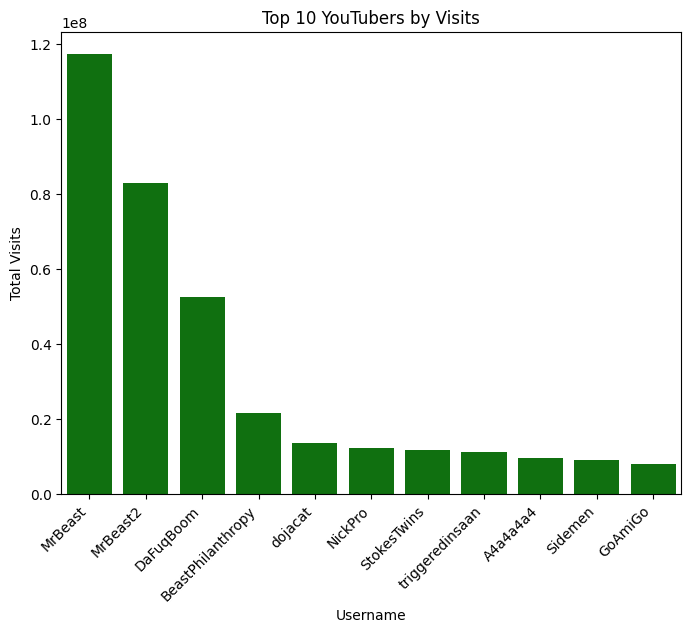

In [24]:
# Visualize the Top_10 Youtubers according to their number of visits
plt.figure(figsize=(8, 6))
sns.barplot(x=top_10.index, y='Visits', data=top_10, color="green")
plt.title('Top 10 YouTubers by Visits')
plt.xlabel('Username')
plt.ylabel('Total Visits')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
plt.show();

The barchart above depicts the top 10 YouTubers by number of visits.
1. MrBeast
2. DaFuqBoom
3. BeastPhilanthropy
4. dojacat
5. NickPro
6. StokesTwins
7. triggeredinsaan
8. A4a4a4a4
9. Sidemen
10. GoAm

In [25]:
top_cat=df_filtered.groupby(['Categories']).sum().sort_values(by = ['Visits'], ascending = False)
top_cat.head(15)

,Username,Subscribers,Country,Visits,Likes,Comments,Links
Categories,,,,,,,
"Video Games, Humor",MrBeastbrentriveraPrestonYTrugStokesTwinsBenAz...,459600000.0,United StatesUnited StatesUnited StatesUnited ...,173284800.0,7090900.0,81726.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
Daily Vlogs,shfa-1MrBeast2SandeepSeminarsNichLmaoishaanali...,266400000.0,FranceUnited StatesIndiaUnited StatesIndiaIndi...,120800000.0,6756700.0,33936.0,http://youtube.com/channel/UCwHE1kM1CPJd_pI9FQ...
"Animation, Humor",A4a4a4a4SSSniperWolffedevigevanijacksepticeyeD...,335100000.0,RussiaUnited StatesMexicoUnited StatesUnited S...,99400000.0,3772100.0,139281.0,http://youtube.com/channel/UC2tsySbe9TNrI-xh2l...
Music and Dance,BTSTaylorSwiftArianaGrandeKimberlyLoaizanickim...,445500000.0,IndiaUnited StatesUnited StatesMexicoUnited St...,44962500.0,1828200.0,139387.0,http://youtube.com/channel/UCLkAepWjdylmXSltof...
"Animation, Video Games",markiplierAboFlahdreamDanTDMVanossGamingalanbe...,277400000.0,United StatesIraqUnited StatesUnited StatesUni...,32800000.0,2388500.0,120400.0,http://youtube.com/channel/UC7_YxT-KID8kRbqZo7...
Food and Drink,HowToBasicBeastPhilanthropymattstoniemispastel...,77600000.0,United StatesUnited StatesUnited StatesMexicoU...,31100000.0,1499700.0,34603.0,http://youtube.com/channel/UCR4s1DE9J4DHzZYXMl...
"Movies, Humor",ZachKingIanLucasOficialAayuandPihuShowIvanaAla...,132200000.0,United StatesArgentinaIndiaPhilippinesUnited S...,23865100.0,1129500.0,25322.0,http://youtube.com/channel/UCq8DICunczvLuJJq41...
Video Games,dudeperfectSlivkiShowhowridiculousHiBestManGLE...,219600000.0,United StatesRussiaUnited StatesRussiaRussiaRu...,23600000.0,996000.0,27008.0,http://youtube.com/channel/UCRijo3ddMTht_IHyNS...
Humor,royaltyfamtriggeredinsaanZeinabHarakeVlogsSPDN...,80200000.0,United StatesIndiaPhilippinesThailandJapan,22300000.0,1674500.0,50737.0,http://youtube.com/channel/UCja7QUMRG9AD8X2F_v...


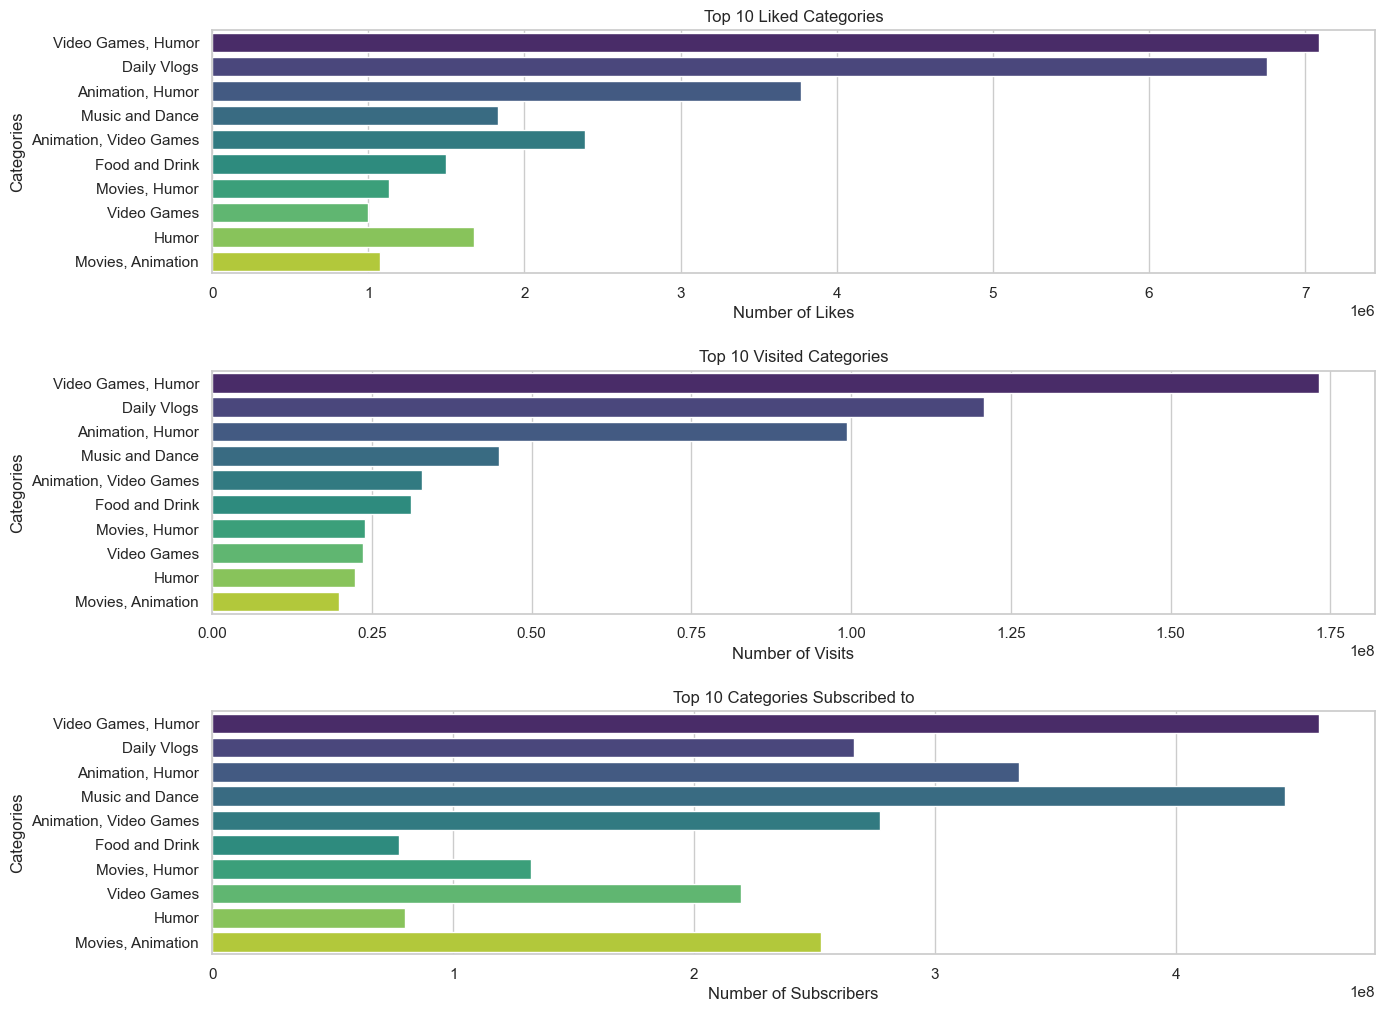

In [26]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axs = plt.subplots(figsize=(15, 12), nrows=3, ncols=1)
plt.subplots_adjust(hspace=0.4)

# Top 10 Liked Categories
sns.barplot(x='Likes', y=top_cat[:10].index, data=top_cat[:10],
            estimator=sum, ci=None, ax=axs[0], palette='viridis')
axs[0].set_title('Top 10 Liked Categories')
axs[0].set_xlabel('Number of Likes')

# Top 10 Visited Categories
sns.barplot(x='Visits', y=top_cat[:10].index, data=top_cat[:10],
            estimator=sum, ci=None, ax=axs[1], palette='viridis')
axs[1].set_title('Top 10 Visited Categories')
axs[1].set_xlabel('Number of Visits')

# Top 10 Categories Subscribed to
sns.barplot(x='Subscribers', y=top_cat[:10].index, data=top_cat[:10],
            estimator=sum, ci=None, ax=axs[2], palette='viridis')
axs[2].set_title('Top 10 Categories Subscribed to')
axs[2].set_xlabel('Number of Subscribers')

# Show the plot
plt.show()

The most popular categories are:
- Video games
- Daily Vlogs
- Animation (Humour)
- Music and Dance
- Animation (Video Games)
- Food and Drinks
- Movies (Humour)
- Movies (Animation)- 

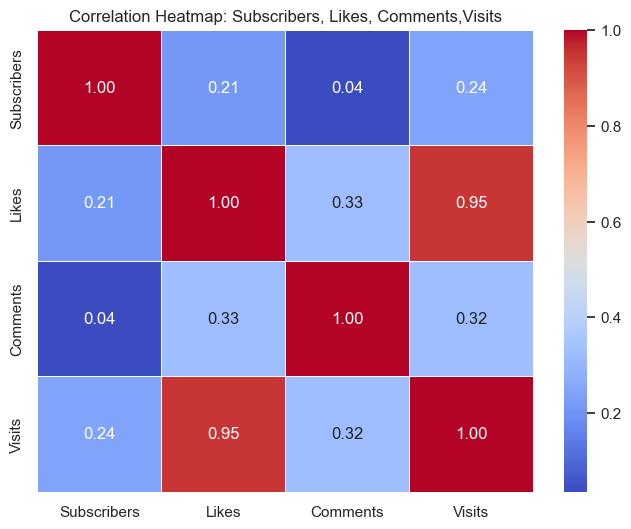

In [27]:
# to find correlation between no.of.Subscribers and no.of.likes
subset_df = df[['Subscribers', 'Likes', 'Comments','Visits']]
correlation_matrix = subset_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap: Subscribers, Likes, Comments,Visits')
plt.show()

**Observations:**
- There is no correlation between `Subscribers` and `Likes` but a strong correlation exist between `Visits` and `Likes`. Furthermore, there exist a weak linear relationship between `Visits` and `Comments` as well as `Likes` and `Comments`. However, there is no correlation between `Comments` and `Subscribers`

# Audience Study
- Analyze the distribution of streamers audiences by country. Are there regional preferences for
    specific content categories?

In [28]:
df_filtered.groupby(["Country",'Categories']).sum().sort_values(by = ['Visits'], ascending = False).head(25)

Username  \
Country        Categories                                                                  
United States  Video Games, Humor      MrBeastbrentriveraPrestonYTrugStokesTwinsBenAz...   
               Daily Vlogs                                      MrBeast2NichLmaojoerogan   
               Animation, Humor        SSSniperWolfjacksepticeyeDaFuqBoomtopperguildM...   
               Food and Drink          HowToBasicBeastPhilanthropymattstonieNickDiGio...   
               Music and Dance         TaylorSwiftArianaGrandenickiminajromeoOliviaRo...   
               Animation, Video Games  markiplierdreamDanTDMVanossGamingalanbeckerSSu...   
India          Daily Vlogs             SandeepSeminarsishaanali11souravjoshivlogs7028...   
United States  Sports                                                     NickProredbull   
Russia         Video Games             SlivkiShowHiBestManGLENTYOUTUBEkuplinovplayEdi...   
United States  Movies                                            GameTheorypenguinz0ryan   
India          Humor                                                     triggeredinsaan   
Mexico         Animation, Humor                             fedevigevanicapitanyolotroll   
United States  Video Games                            dudeperfecthowridiculouscolinfurze   
               Movies, Humor                            ZachKingromanatwoodvlogsIanBoggs   
               Science and Technology                 VsaucemkbhdLinusTechTipsveritasium   
Russia         Animation, Humor                                                 A4a4a4a4   
United Kingdom Video Games, Humor                                                Sidemen   
Colombia       Daily Vlogs                                                       GoAmiGo   
United States  Music and Dance, Humor                                       jordanmatter   
Mexico         Movies, Animation          JuegaGermanMikecrackYOLOAVENTURASauronelrubius   
India          Movies, Animation                                              MakeJokeOf   
               Education                                        khangsresearchcentre1685   
               News and Politics                                             dhruvrathee   
Argentina      Animation                                                       AlejoIgoa   
               Movies, Humor                                             IanLucasOficial   

                                       Subscribers       Visits      Likes  \
Country        Categories                                                    
United States  Video Games, Humor      422700000.0  158984800.0  6415400.0   
               Daily Vlogs              74400000.0   85800000.0  5106500.0   
               Animation, Humor        209800000.0   74500000.0  2545800.0   
               Food and Drink           62600000.0   29400000.0  1410000.0   
               Music and Dance         178500000.0   25400000.0  1011700.0   
               Animation, Video Games  198300000.0   23300000.0  1528700.0   
India          Daily Vlogs             124400000.0   20400000.0  1065100.0   
United States  Sports                   25800000.0   13600000.0   338300.0   
Russia         Video Games             115200000.0   11500000.0   605300.0   
United States  Movies                   45400000.0   11300000.0   414400.0   
India          Humor                    20400000.0   11100000.0  1400000.0   
Mexico         Animation, Humor         55100000.0   10900000.0   601500.0   
United States  Video Games              91400000.0   10500000.0   294400.0   
               Movies, Humor            52500000.0    9900000.0   520500.0   
               Science and Technology   67100000.0    9800000.0   695700.0   
Russia         Animation, Humor         47300000.0    9700000.0   330400.0   
United Kingdom Video Games, Humor       19500000.0    9200000.0   284800.0   
Colombia       Daily Vlogs              15400000.0    7900000.0   455300.0   
United States  Music and Dance, Hum

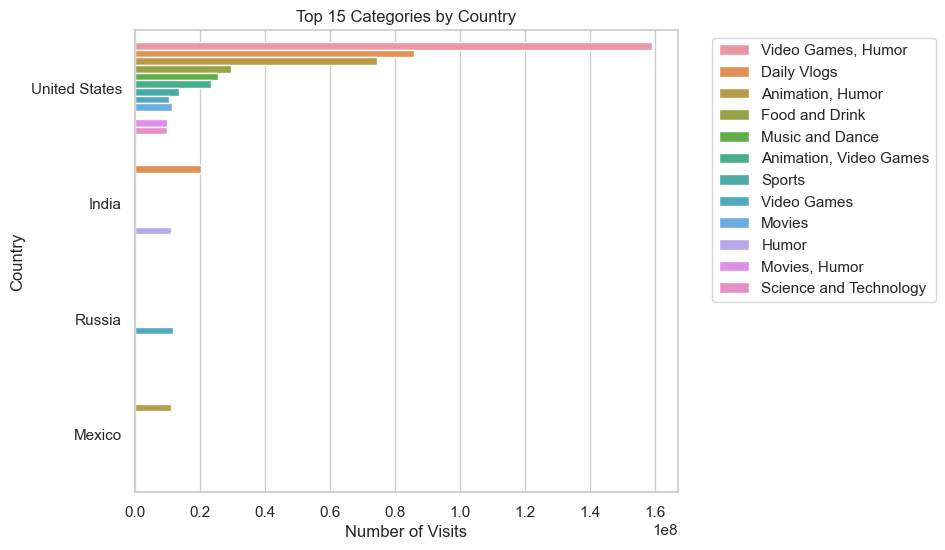

In [29]:
# Assuming df_grouped is the grouped and sorted DataFrame
df_grouped = df_filtered.groupby(["Country", 'Categories']).sum().sort_values(by=['Visits'], ascending=False)[:15].reset_index()

# Set up the matplotlib figure
plt.figure(figsize=(7, 6))
ax=sns.barplot(x='Visits', y='Country', hue='Categories', data=df_grouped)
plt.xlabel('Number of Visits')
plt.title('Top 15 Categories by Country')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

__Observations__:
 - In the dataset, the `Country` variable denotes the countries of the YouTubers.

 - For USA YouTubers, channels focusing on `video games and humor` accumulate the highest number of `visits`, followed by `daily vlogs`, `animations`, and `food & drinks` channels. Conversely, `science and technology` channels receive the least number of visits. Among Indian YouTubers, `daily vlog` channels and `humor` channels are the top two most visited categories. In Russia, `animation` and `humor` are the most visited categories on YouTube.

## Performance Metrics

- Calculate and visualize the average number of subscribers, visits, likes, and comments.
- Are there patterns or anomalies in these metrics?

In [30]:
# Identify streamers with above-average performance in terms of subscribers, visits, likes, and comments.
# Identify top-performing content creators based on above-average metrics
# Calculate average metrics
average_likes = df['Likes'].mean()
average_comments = df['Comments'].mean()
average_subscribers = df['Subscribers'].mean()

# Filter top performers based on above-average metrics
top_performers = df[
    (df['Likes'] > average_likes) &
    (df['Comments'] > average_comments) &
    (df['Subscribers'] > average_subscribers)
]

# Sort by different metrics to get top performers for each metric
top_likes = top_performers.nlargest(10, 'Likes')[['Username', 'Likes']]
top_comments = top_performers.nlargest(10, 'Comments')[['Username', 'Comments']]
top_subscribers = top_performers.nlargest(10, 'Subscribers')[['Username', 'Subscribers']]

# Display top 10 performers for each metric
print("Top 10 Performers by Likes:")
print(top_likes)
print("\nTop 10 Performers by Comments:")
print(top_comments)
print("\nTop 10 Performers by Subscribers:")
print(top_subscribers)

Top 10 Performers by Likes:
                 Username      Likes
1                 MrBeast  5300000.0
136              MrBeast2  5000000.0
153             DaFuqBoom  1700000.0
123        MRINDIANHACKER   617400.0
238            alanbecker   582600.0
131          fedevigevani   412200.0
281  souravjoshivlogs7028   382300.0
122               AboFlah   382000.0
98   TechnoGamerzOfficial   341800.0
43               A4a4a4a4   330400.0

Top 10 Performers by Comments:
                 Username  Comments
153             DaFuqBoom   82800.0
177                DanTDM   52500.0
123        MRINDIANHACKER   26000.0
43               A4a4a4a4   22000.0
132                 dream   19000.0
1                 MrBeast   18500.0
131          fedevigevani   17000.0
98   TechnoGamerzOfficial   16500.0
62         KimberlyLoaiza   16000.0
34            TaylorSwift   15000.0

Top 10 Performers by Subscribers:
        Username  Subscribers
1        MrBeast  183500000.0
5      PewDiePie  111500000.0
10     BLACK

### Brief Explanation

This code segment aims to identify and display the top ten content creators based on different performance metrics (likes, comments, subscribers). Here's a breakdown:

#### Calculating Average Metrics
- The code starts by calculating the average values for **'likes'**, **'comments'**, and **'subscribers'** from the **'Likes'**, **'Comments'**, and **'Subscribers'** columns of the `df` DataFrame using the `mean()` function.

#### Filtering Top Performers
- It filters the `df` DataFrame to find content creators whose metrics (likes, comments, subscribers) are higher than the average values calculated earlier. This is done using boolean indexing and the `&` operator to combine conditions.

#### Identifying Top Performers for Each Metric
- For each metric (likes, comments, subscribers), it sorts the filtered DataFrame (`top_performers`) in descending order based on that specific metric using the `nlargest()` function. This function selects the top ten performers for each metric separately.

#### Displaying Top Performers
- The code then displays the top ten performers for each metric in a tabular format. It prints the usernames of the content creators along with their corresponding metric values (likes, comments, subscribers).

In summary, this code snippet helps to identify and display the top ten content creators separately for likes, comments, and subscribers based on their performance metrics, providing insights into the top-performing creators in each category. Adjust the column names (**'Likes'**, **'Comments'**, **'Subscribers'**) in the code to match your actual dataset columns if they are different.

In [31]:
avg = pd.DataFrame(df.select_dtypes(include='number').mean(), columns=["Mean"])
avg.head()

,Mean
Subscribers,2.193038e+07
Visits,1.215601e+06
Likes,5.390243e+04
Comments,1.296157e+03


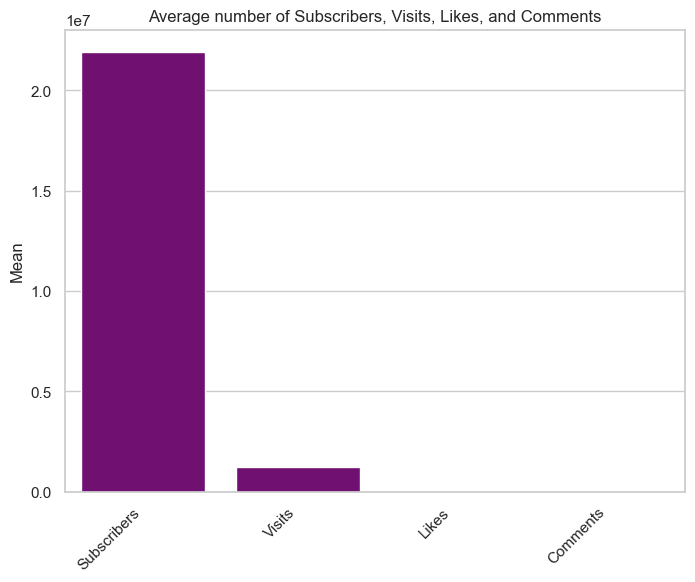

In [32]:
# Visualize the Average number of Subscribers, Visits, Likes, and Comments
plt.figure(figsize=(8, 6))
sns.barplot(x=avg.index, y='Mean', data=avg, color="purple")
plt.title('Average number of Subscribers, Visits, Likes, and Comments')
plt.ylabel('Mean')
plt.xticks(rotation=45, ha='right')  
plt.show();

- Indeed, anomalies are present when the number of `subscribers` surpasses the number of `likes` and `visitors`. Such deviations from typical engagement patterns may warrant further investigation to understand the underlying reasons for this unusual behavior. It could be influenced by various factors, including the authenticity of subscriber counts, the content's resonance with the audience, or potential manipulations in data reporting. Examining these anomalies in more detail can provide insights into the accuracy and reliability of the dataset.

## Content Categories

- Explore the distribution of content categories. Which categories have the highest number of
  streamers?
- Are there specific categories with exceptional performance metrics?

In [33]:
top_stream=df_filtered.groupby(['Categories']).sum().sort_values(by = ['Visits'], ascending = False)
top_stream.head(15)

,Username,Subscribers,Country,Visits,Likes,Comments,Links
Categories,,,,,,,
"Video Games, Humor",MrBeastbrentriveraPrestonYTrugStokesTwinsBenAz...,459600000.0,United StatesUnited StatesUnited StatesUnited ...,173284800.0,7090900.0,81726.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
Daily Vlogs,shfa-1MrBeast2SandeepSeminarsNichLmaoishaanali...,266400000.0,FranceUnited StatesIndiaUnited StatesIndiaIndi...,120800000.0,6756700.0,33936.0,http://youtube.com/channel/UCwHE1kM1CPJd_pI9FQ...
"Animation, Humor",A4a4a4a4SSSniperWolffedevigevanijacksepticeyeD...,335100000.0,RussiaUnited StatesMexicoUnited StatesUnited S...,99400000.0,3772100.0,139281.0,http://youtube.com/channel/UC2tsySbe9TNrI-xh2l...
Music and Dance,BTSTaylorSwiftArianaGrandeKimberlyLoaizanickim...,445500000.0,IndiaUnited StatesUnited StatesMexicoUnited St...,44962500.0,1828200.0,139387.0,http://youtube.com/channel/UCLkAepWjdylmXSltof...
"Animation, Video Games",markiplierAboFlahdreamDanTDMVanossGamingalanbe...,277400000.0,United StatesIraqUnited StatesUnited StatesUni...,32800000.0,2388500.0,120400.0,http://youtube.com/channel/UC7_YxT-KID8kRbqZo7...
Food and Drink,HowToBasicBeastPhilanthropymattstoniemispastel...,77600000.0,United StatesUnited StatesUnited StatesMexicoU...,31100000.0,1499700.0,34603.0,http://youtube.com/channel/UCR4s1DE9J4DHzZYXMl...
"Movies, Humor",ZachKingIanLucasOficialAayuandPihuShowIvanaAla...,132200000.0,United StatesArgentinaIndiaPhilippinesUnited S...,23865100.0,1129500.0,25322.0,http://youtube.com/channel/UCq8DICunczvLuJJq41...
Video Games,dudeperfectSlivkiShowhowridiculousHiBestManGLE...,219600000.0,United StatesRussiaUnited StatesRussiaRussiaRu...,23600000.0,996000.0,27008.0,http://youtube.com/channel/UCRijo3ddMTht_IHyNS...
Humor,royaltyfamtriggeredinsaanZeinabHarakeVlogsSPDN...,80200000.0,United StatesIndiaPhilippinesThailandJapan,22300000.0,1674500.0,50737.0,http://youtube.com/channel/UCja7QUMRG9AD8X2F_v...


- The most effective way to identify the highest number of streamers is by utilizing the 'visit' metric. This is because there are subscribers who do not actively visit channels, and, in addition, other YouTube users may frequently visit channels without necessarily subscribing to them.
- Let's visualize the top categories with the number of `Visits`

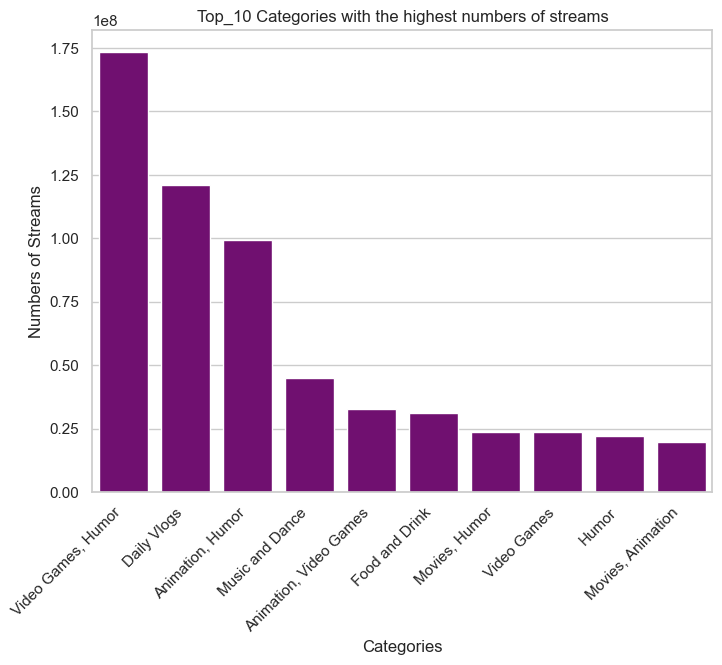

In [34]:
# Visualize the Top_10 Categories with the highest numbers of streams
plt.figure(figsize=(8, 6))
sns.barplot(x=top_stream[:10].index, y='Visits', data=top_stream[:10], color="purple")
plt.title('Top_10 Categories with the highest numbers of streams')
plt.xlabel('Categories')
plt.ylabel('Numbers of Streams')
plt.xticks(rotation=45, ha='right') 
plt.show();

- We can clearly see the Categories with the highest number of streams in descending order 

In [35]:
#  top 1% across all metrics
df2=df.copy()
df2 = df2[df2["Categories"] != 'Unknown']
df2 = df2[df2["Country"] != 'Unknown']
df2_numeric = df2.select_dtypes(include='number')
top_1_per = df2_numeric.quantile(0.99)

In [36]:
top_1_per

Subscribers    88114000.0
Visits         11930000.0
Likes            538914.0
Comments          22920.0
Name: 0.99, dtype: float64

In [37]:
# assign the top 1% of each columns to a new variable 
sus, vis, lik, com =np.round(top_1_per.values)

In [38]:
# subset the sum of each categories to a new
cat = df2.groupby('Categories').sum()

mask_sub = cat['Subscribers'] > sus
mask_vis = cat['Visits'] > vis
mask_lik= cat['Likes'] > lik
mask_com = cat['Comments'] > com

In [39]:
top_cat= cat[mask_sub & mask_vis & mask_lik & mask_com]
top_cat.sort_values(by= 'Visits', ascending=False)

,Username,Subscribers,Country,Visits,Likes,Comments,Links
Categories,,,,,,,
"Video Games, Humor",MrBeastbrentriveraPrestonYTrugStokesTwinsBenAz...,4.890000e+08,United StatesUnited StatesUnited StatesUnited ...,174074500.0,7148700.0,82060.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
Daily Vlogs,shfa-1MrBeast2SandeepSeminarsNichLmaoishaanali...,5.351000e+08,FranceUnited StatesIndiaUnited StatesIndiaUnit...,124394700.0,6916130.0,36252.0,http://youtube.com/channel/UCwHE1kM1CPJd_pI9FQ...
"Animation, Humor",A4a4a4a4SSSniperWolfLucasandMarcusfedevigevani...,4.987000e+08,RussiaUnited StatesUnited StatesMexicoUnited S...,101344000.0,3932460.0,144040.0,http://youtube.com/channel/UC2tsySbe9TNrI-xh2l...
Music and Dance,tserieszeemusiccompanyBLACKPINKBTSHYBELABELSKo...,3.824400e+09,IndiaIndiaUnited StatesIndiaUnited StatesBrazi...,56657800.0,2751559.0,319495.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
"Animation, Video Games",markiplierjbalvinAboFlahdreamLankyBoxDanTDMVan...,6.594000e+08,United StatesColombiaIraqUnited StatesUnited S...,40802000.0,2695997.0,128745.0,http://youtube.com/channel/UC7_YxT-KID8kRbqZo7...
Food and Drink,buzzfeedtastyBuzzFeedVideoGoodMythicalMorningH...,1.772000e+08,United StatesUnited StatesUnited StatesUnited ...,32184800.0,1542077.0,36641.0,http://youtube.com/channel/UCJFp8uSYCjXOMnkUyb...
"Movies, Humor",CarryMinatiMrBeansmoshdanrhodesTRANS7OfficialZ...,5.091000e+08,IndiaIndiaUnited StatesUnited StatesIndonesiaU...,29574300.0,1347527.0,34082.0,http://youtube.com/channel/UCj22tfcQrWG7EMEKS0...
"Movies, Animation",SonySABMOVIECLIPSJuegaGermanHarPalGeoOfficialM...,1.159300e+09,IndiaUnited StatesMexicoPakistanMexicoBrazilIn...,29210200.0,1535496.0,39190.0,http://youtube.com/channel/UC6-F5tO8uklgE9Zy8I...
Video Games,WWEdudeperfectShakiraMrMaxLifeNinjaKidzSlivkiS...,4.747000e+08,United StatesUnited StatesUnited StatesRussiaU...,26355600.0,1085300.0,33443.0,http://youtube.com/channel/UCJ5v_MCY6GNUBTO8-D...


The Categories with exceptional performance are:

- Video Games
- Daily Vlogs
- Animation
- Music and Dance
- Food and Drink
- Movies
- Education

## Brands and Collaborations:
- Analyze whether streamers with high performance metrics receive more brand collaborations and
  marketing campaigns.

### Information on Branding and Collaborations was not provided in the dataset

## Benchmarking
- Identify streamers with above-average performance in terms of subscribers, visits, likes, and comments.
- Who are the top-performing content creators?

In [40]:
# Obtain the average value across all metrics
#sub_avg, vis_avg, lik_avg, com_avg = np.round(df.mean().values)
# Calculate mean values for numeric columns only
numeric_cols = df.select_dtypes(include='number')
mean_values = np.round(numeric_cols.mean().values)
sub_avg, vis_avg, lik_avg, com_avg = mean_values

In [41]:
mask_sub = df['Subscribers'] > sub_avg
mask_visits = df['Visits'] > vis_avg
mask_likes = df['Likes'] > lik_avg
mask_comments = df['Comments'] > com_avg

above_avg = df[mask_sub & mask_visits & mask_likes & mask_comments]

In [42]:
above_avg.head()

,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links
1,MrBeast,"Video Games, Humor",183500000.0,United States,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
5,PewDiePie,"Movies, Video Games",111500000.0,United States,2400000.0,197300.0,4900.0,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...
26,dudeperfect,Video Games,59700000.0,United States,5300000.0,156500.0,4200.0,http://youtube.com/channel/UCRijo3ddMTht_IHyNS...
34,TaylorSwift,Music and Dance,54100000.0,United States,4300000.0,300400.0,15000.0,http://youtube.com/channel/UCqECaJ8Gagnn7YCbPE...
39,JuegaGerman,"Movies, Animation",48600000.0,Mexico,2000000.0,117100.0,3000.0,http://youtube.com/channel/UCYiGq8XF7YQD00x7wA...


In [43]:
above_avg.shape

(36, 8)

- Out of the 994 YouTubers analyzed in this dataset, only 36 exhibit performance metrics above the average across all metrics.

In [44]:
top_10=above_avg.groupby('Username').sum().sort_values(by = 'Likes', ascending = False)
top_10.head(15)

,Categories,Subscribers,Country,Visits,Likes,Comments,Links
Username,,,,,,,
MrBeast,"Video Games, Humor",183500000.0,United States,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
MrBeast2,Daily Vlogs,31300000.0,United States,83100000.0,5000000.0,11600.0,http://youtube.com/channel/UC4-79UOlP48-QNGgCk...
DaFuqBoom,"Animation, Humor",29800000.0,United States,52700000.0,1700000.0,82800.0,http://youtube.com/channel/UCsSsgPaZ2GSmO6il8C...
MRINDIANHACKER,Unknown,32600000.0,India,6500000.0,617400.0,26000.0,http://youtube.com/channel/UCSiDGb0MnHFGjs4E2W...
alanbecker,"Animation, Video Games",24300000.0,United States,7600000.0,582600.0,5900.0,http://youtube.com/channel/UCbKWv2x9t6u8yZoB3K...
fedevigevani,"Animation, Humor",32000000.0,Mexico,7700000.0,412200.0,17000.0,http://youtube.com/channel/UCoQm-PeHC-cbJclKJY...
souravjoshivlogs7028,Daily Vlogs,22700000.0,India,5600000.0,382300.0,8900.0,http://youtube.com/channel/UCjvgGbPPn-FgYeguc5...
AboFlah,"Animation, Video Games",32700000.0,Iraq,3300000.0,382000.0,11400.0,http://youtube.com/channel/UCqq5n-Oe-r1EEHI3yv...
TechnoGamerzOfficial,Unknown,35600000.0,India,6200000.0,341800.0,16500.0,http://youtube.com/channel/UCX8pnu3DYUnx8qy8V_...


#### In all metrics, the following top 10 content creators stand out:

1. MrBeast
2. DaFuqBoom
3. MRINDIANHACKER
4. alanbecker
5. fedevigevani
6. souravjoshivlogs7028
7. AboFlah
8. TechnoGamerzOfficial
9. A4a4a4a4
10. VillageCookingChannel

## Content Recommendations:
- Recommend 10 influencers similar to the user input.

In [45]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from IPython.display import display

# Function to recommend similar content creators based on categories using Cosine similarity
def recommend_similar_creators(username, df):
    try:
        # Extract categories for the specified username
        user_categories = df[df['Username'] == username]['Categories'].iloc[0]

        # Create a CountVectorizer instance to convert categories into a matrix of token counts
        vectorizer = CountVectorizer()
        category_matrix = vectorizer.fit_transform(df['Categories'])

        # Compute cosine similarity between the user's categories and all other creators' categories
        user_vector = vectorizer.transform([user_categories])
        similarity_scores = cosine_similarity(user_vector, category_matrix)

        # Enumerate through similarity scores to pair with usernames
        similar_creators = []
        for idx, score in enumerate(similarity_scores[0]):
            if df.iloc[idx]['Username'] != username:
                similar_creators.append((df.iloc[idx]['Username'], score))

        # Sorting and selecting top 10 similar creators based on cosine similarity
        similar_creators = sorted(similar_creators, key=lambda x: x[1], reverse=True)[:10]

        # Creating a DataFrame for the similar creators
        similar_creators_df = pd.DataFrame(similar_creators, columns=['Top 10 Similar Creators', 'Cosine Similarity'])
        
        return similar_creators_df
    except IndexError:
        return "Username not found or insufficient data for recommendations."

# Example usage:
# Assuming 'df' is your DataFrame containing 'Username' and 'Categories' columns

# Taking input from the user
input_username = input("Enter the username for which you want recommendations: ")

# Calling the function
recommendations_df = recommend_similar_creators(input_username, df)

# Display recommendations in tabular format
print("Recommended similar creators based on Cosine Similarity:")
display(recommendations_df)

Enter the username for which you want recommendations:  MrBeast


Recommended similar creators based on Cosine Similarity:


,Top 10 Similar Creators,Cosine Similarity
0,brentrivera,1.0
1,PrestonYT,1.0
2,rug,1.0
3,StokesTwins,1.0
4,BenAzelart,1.0
5,infinite,1.0
6,IShowSpeed,1.0
7,Sidemen,1.0
8,TheBrianMaps,1.0
9,Unspeakable,1.0


### Brief Explanation

The code defines a function called `recommend_similar_creators` that aims to find content creators similar to a specified username based on shared categories using cosine similarity. Here's a breakdown:

#### Comparing Categories
- When you provide a username as input to the function, it extracts the categories associated with that username from the DataFrame (`df`). Then, it iterates through each content creator in the DataFrame, excluding the provided username.

#### Calculating Similarity
- For each other content creator, the function looks at the categories they are associated with and computes a similarity score using cosine similarity between their categories and the categories of the specified username.

#### Creating Recommendations
- The function collects these similarity scores for all creators, sorts them in descending order, and selects the top 10 creators who share the most similar content categories with the specified username based on cosine similarity.
- Finally, it returns a list of usernames as recommendations for similar conte

Overall, the function helps find YouTube content creators who produce content similar to a particular user based on shared categories of content, utilizing cosine similarity for accurate comparison.